Enter the number of nodes:  5

Enter node:  1
Enter the number of edges for node 1:  2
Enter neighbor and weight (space-separated):  2 10
Enter neighbor and weight (space-separated):  3 3

Enter node:  2
Enter the number of edges for node 2:  2
Enter neighbor and weight (space-separated):  3 1
Enter neighbor and weight (space-separated):  4 2

Enter node:  3
Enter the number of edges for node 3:  3
Enter neighbor and weight (space-separated):  2 4
Enter neighbor and weight (space-separated):  4 8
Enter neighbor and weight (space-separated):  5 2

Enter node:  4
Enter the number of edges for node 4:  1
Enter neighbor and weight (space-separated):  5 7

Enter node:  5
Enter the number of edges for node 5:  1
Enter neighbor and weight (space-separated):  4 9

Enter start node:  1


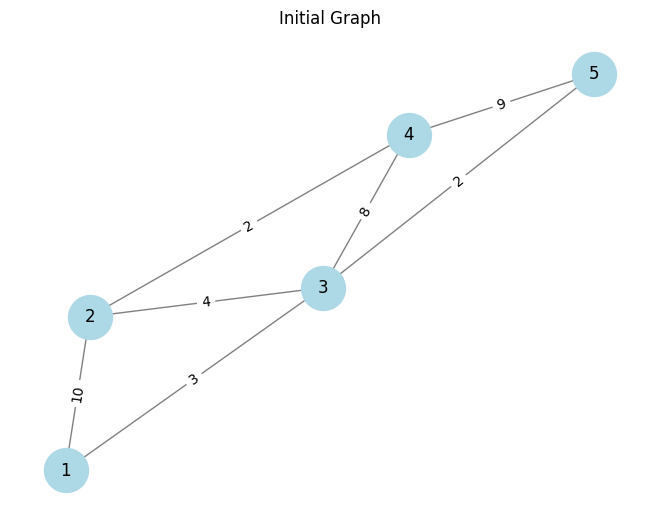


Running Dijkstra's Algorithm...


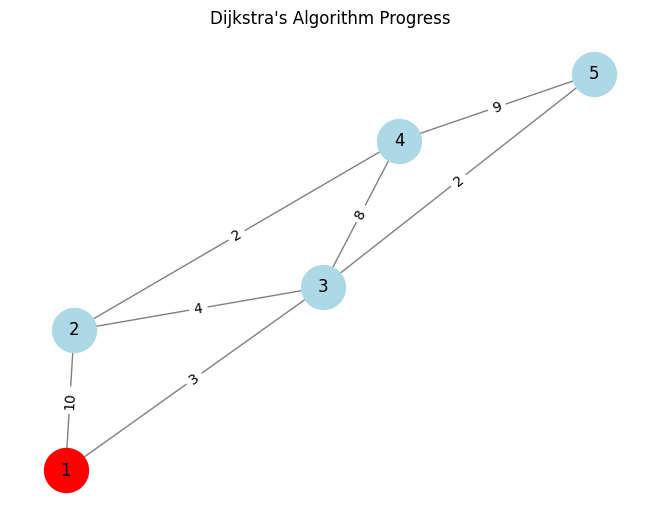

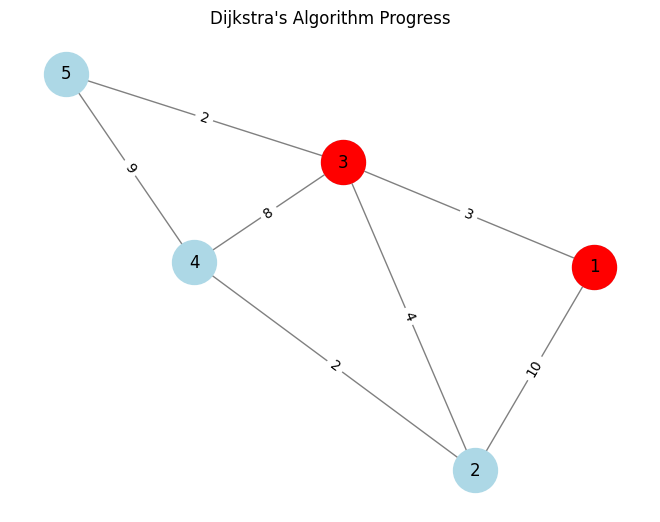

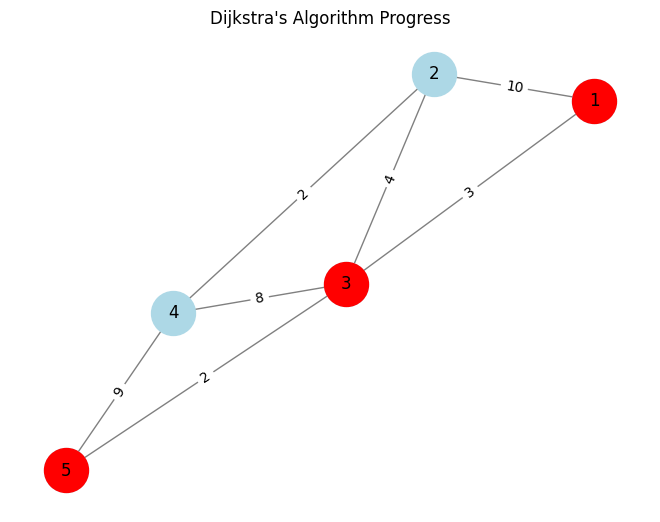

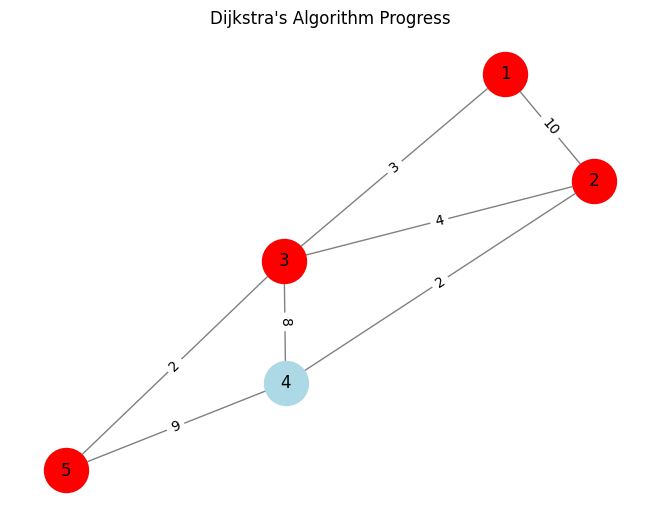

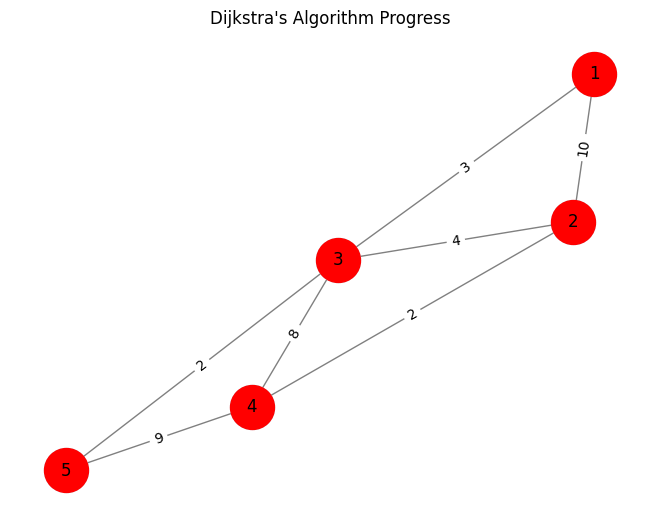


Shortest Paths from Node 1:
To node 2: Cost = 7, Path = 1 -> 3 -> 2
To node 3: Cost = 3, Path = 1 -> 3
To node 4: Cost = 9, Path = 1 -> 3 -> 2 -> 4
To node 5: Cost = 5, Path = 1 -> 3 -> 5


In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph):
    """Draws the initial graph before running Dijkstra's Algorithm."""
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            edge_color='gray', node_size=1000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
    plt.title("Initial Graph")
    plt.show()

def visualize_dijkstra(graph, visited):
    """Visualizes Dijkstra's Algorithm progress with visited nodes in red."""
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    labels = {node: str(node) for node in G.nodes}  # Show only node numbers
    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.clf()
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue',
            edge_color='gray', node_size=1000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red',
                           node_size=1000)
    plt.title("Dijkstra's Algorithm Progress")
    plt.pause(1)

def dijkstra(graph, start):
    """Runs Dijkstra's Algorithm and returns the shortest paths."""
    heap = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    previous = {node: None for node in graph}  # To track the shortest path

    while heap:
        cost, node = heapq.heappop(heap)
        if node in visited:
            continue
        visited.add(node)
        visualize_dijkstra(graph, visited)
        for neighbor, weight in graph[node]:
            new_cost = cost + weight
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                previous[neighbor] = node
                heapq.heappush(heap, (new_cost, neighbor))

    return distances, previous

def get_shortest_path(previous, start, end):
    """Backtracks to find the shortest path from start to end."""
    path = []
    while end is not None:
        path.append(end)
        end = previous[end]
    return path[::-1]

# --- User Input ---
graph = {}
num_nodes = int(input("Enter the number of nodes: "))
for _ in range(num_nodes):
    node = int(input("\nEnter node: "))
    graph[node] = []
    num_edges = int(input(f"Enter the number of edges for node {node}: "))
    for _ in range(num_edges):
        neighbor, weight = map(int, input("Enter neighbor and weight (space-separated): ").split())
        graph[node].append((neighbor, weight))

start_node = int(input("\nEnter start node: "))

# Show Initial Graph
draw_graph(graph)

# Run Dijkstra's Algorithm
plt.ion()
print("\nRunning Dijkstra's Algorithm...")
shortest_paths, previous_nodes = dijkstra(graph, start_node)
plt.ioff()
plt.show()

# Final Output: Display Shortest Paths
print(f"\nShortest Paths from Node {start_node}:")
for node in shortest_paths:
    if node != start_node:
        path = get_shortest_path(previous_nodes, start_node, node)
        print(f"To node {node}: Cost = {shortest_paths[node]}, Path = {' -> '.join(map(str, path))}")
